# DATA SCIENCE PROJECT @ THE SPARKS FOUNDATION

# GRIPMAY'21

## TASK1 : PREDICTION USING SUPERVISED MACHINE LEARNING

### OBJECTIVE : PREDICTING THE PERCENTAGE OF STUDENT BASED ON NUMBER OF STUDY HOURS

### Author: MEGHA KOTHARI

##### SIMPLE LINEAR REGRESSION
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just 2 variables.

#### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline

#### IMPORTING DATA

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

As we see that there is no null value in our dataset.So,we proceed to visualize our data .

### Data Visualization

Data visualization basically refers to the graphical representation or visual representation of information and data using visual elements like charts,graphs,and maps etc.
Here,we are using Line Chart and Scatter Plot for data visualization.
Library used for data visualization is matplotlib.

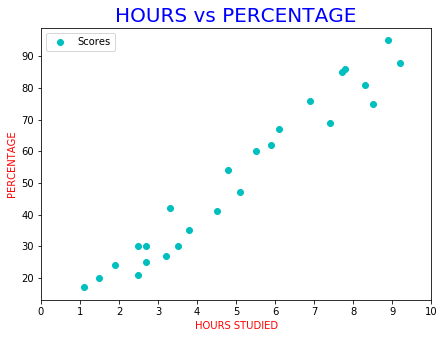

In [7]:
data.plot(x= 'Hours', y= 'Scores' ,c='c', style='o',figsize=(7,5))
plt.title("HOURS vs PERCENTAGE",color="blue",fontsize="20")
plt.xlabel("HOURS STUDIED",color="red",fontsize="10")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.ylabel("PERCENTAGE",color="red",fontsize="10")
plt.show()

The above chart shows there is a positive relationship between hours studied and percentage scored by student





### Dividing Dataset into Features(independent variable) and Targets(dependent variable)

In [8]:
x=data[['Hours']].values
y=data['Scores'].values

### here ,x = Feature(independent variable) and y = Target(dependent variable)



### Split Dataset into Training and Testing Data 

We use scikit learn inbuilt library i.e. train_test_split() method for splitting dataset into training and testing data

In [9]:
### importing sklearn library
from sklearn.model_selection import train_test_split

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)


### Building Model

As we split dataset into training and testing data ,now we built the model and train the model using our algorithm


In [11]:
###importing algorithm we are using
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [12]:
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print("training complete")

training complete


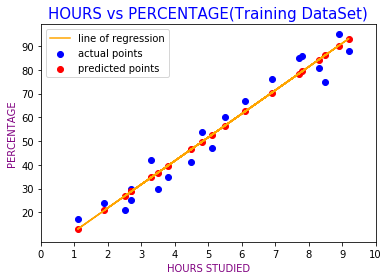

In [14]:
### plotting for train data
plt.scatter(xtrain,ytrain,color="blue",label="actual points")
plt.scatter(xtrain,model.predict(xtrain),color="red",label="predicted points")
plt.plot(xtrain,model.predict(xtrain),color="orange",label="line of regression")
plt.title("HOURS vs PERCENTAGE(Training DataSet)",color="blue",fontsize="15")
plt.xlabel("HOURS STUDIED",color="purple",fontsize="10")
plt.ylabel("PERCENTAGE",color="purple",fontsize="10")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.yticks([20,30,40,50,60,70,80,90])
plt.legend(loc="best")
plt.show()

### MAKING PREDICTIONS

In [15]:
print(xtest) #TESTING VALUES

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
ypred=model.predict(xtest)
print(ypred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


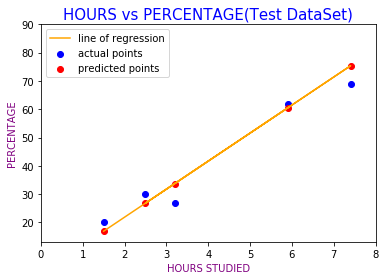

In [17]:
### plotting for test data
plt.scatter(xtest,ytest,color="blue",label="actual points")
plt.scatter(xtest,ypred,color="red",label="predicted points")
plt.plot(xtest,ypred,color="orange",label="line of regression")
plt.title("HOURS vs PERCENTAGE(Test DataSet)",color="blue",fontsize="15")
plt.xlabel("HOURS STUDIED",color="purple",fontsize="10")
plt.ylabel("PERCENTAGE",color="purple",fontsize="10")
plt.yticks([20,30,40,50,60,70,80,90])
plt.xticks([0,1,2,3,4,5,6,7,8])
plt.legend()
plt.show()

In [18]:
df=pd.DataFrame({'Actual Value':ytest,'Predicted Value':ypred})
df

,Actual Value,Predicted Value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### LINE OF REGRESSION FORMULA
###### m =SLOPE,
###### c=INTERCEPT,
###### line=m*x+c


In [19]:
m=model.coef_
print("slope : ",m)
c=model.intercept_
print ("intercept : ",c)

slope :  [9.91065648]
intercept :  2.018160041434683


### ACCURACY CHECK and EVALUATING MODEL

For checking the accuracy of model we use r2_score() method from scikit learn. 
For evaluiating the model we use mean square error .It is the average squared difference betweem the predicted value and acctual value.
This step is particularly important to compare how well different algorithms perform on a particular dataset

In [20]:
from sklearn.metrics import r2_score
r2=r2_score(ytest,ypred)
r2*100

94.54906892105356

From r2_score test we can say that the accuracy of our model is 94.54% . So, we can say that our model is a good model

In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(ytest, ypred)) 

Mean Absolute Error: 4.183859899002975


## QUES: PREDICT SCORE IF A STUDENT STUDIES FOR 9.25 Hrs/Day?

In [22]:
def percentage_predict():
  hours=float(input("Enter No. of Hours Studied : "))
  score=model.predict([[hours]])
  score=round(score[0],2)
  print("The predicted percentage(%) is "+str(score)+"% .")
    
percentage_predict()

Enter No. of Hours Studied : 9.25
The predicted percentage(%) is 93.69% .


So,We can say that if a student studies for 9.25 Hrs/day, he/she can score 93.69% in his/her exams.